In [11]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

data = np.loadtxt('smoking.txt')

In [12]:
#Exercise 1
def getFEV1(data):
    smokers = np.array([data[i,:] for i, x in enumerate(data[:,4]) if x == 1])
    nonsmokers = np.array([data[i,:] for i, x in enumerate(data[:,4]) if x == 0])
    
    smokers_FEV1 = smokers[:,1]
    nonsmokers_FEV1 = nonsmokers[:,1]

    return smokers_FEV1, nonsmokers_FEV1

def meanFEV1(data):
    smokers, nonsmokers = getFEV1(data)
    
    return (np.mean(smokers), np.mean(nonsmokers))

In [13]:
meanFEV1(data)

(3.2768615384615383, 2.5661426146010187)

Text(0,0.5,'FEV1-Value')

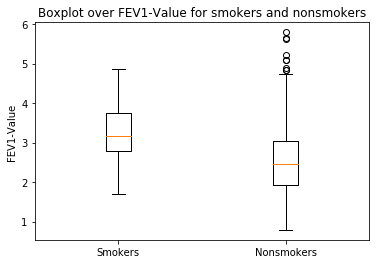

In [14]:
#Exercise 2
smokers, nonsmokers = getFEV1(data)
labels = ['Smokers', 'Nonsmokers']
VALUE = [smokers, nonsmokers]
plt.boxplot(VALUE, labels=labels)
plt.title('Boxplot over FEV1-Value for smokers and nonsmokers')
plt.ylabel('FEV1-Value')

In [15]:
#Exercise 3
def hyptest(data):
    print("Let X and Y be the random variable describing the FEV1-value og smokers and nonsmokers.")
    print("Now, my Null-hypothesis is that mean(X) = mean(Y).")
    print("That is, there is no significant difference between the FEV1-value of smokers vs. nonsmokers.")
    smokers, nonsmokers = getFEV1(data)
    
    std_X = (np.std(smokers) ** 2) / len(smokers)
    std_Y = (np.std(nonsmokers) ** 2) / len(nonsmokers)
    print("Standard deviation of smokers: " + str(std_X) + ", nonsmokers: " + str(std_Y) + ".")
    
    t = (np.mean(smokers) - np.mean(nonsmokers))/np.sqrt(std_X + std_Y)
    print("Value of t-statistic: " + str(t) + ".")
    
    dof_d = (std_X + std_Y) ** 2
    std4_X = np.std(smokers) ** 4
    std4_Y = np.std(nonsmokers) ** 4
    X_d = std4_X / ((len(smokers) ** 2) * (len(smokers) -1))
    Y_d = std4_Y / ((len(nonsmokers) ** 2) * (len(nonsmokers) -1))
    
    dof = np.floor(dof_d / (X_d + Y_d))
    print("Number of freedom degrees: " + str(dof) + ".")
    
    p = scipy.stats.t.cdf(-abs(t),dof) * 2
    print("P value: " + str(p) + ".")
    
    alpha = 0.05
    if p < 0.05:
        print("I reject my Null-hypothesis.")
    else:
        print("I fail to reject my Null-hypothesis.")
        
    return p < 0.05

In [16]:
hyptest(data)

Let X and Y be the random variable describing the FEV1-value og smokers and nonsmokers.
Now, my Null-hypothesis is that mean(X) = mean(Y).
That is, there is no significant difference between the FEV1-value of smokers vs. nonsmokers.
Standard deviation of smokers: 0.00852039899499, nonsmokers: 0.00122607587324.
Value of t-statistic: 7.199031861.
Number of freedom degrees: 83.0.
P value: 2.49456448153e-10.
I reject my Null-hypothesis.


True

0.75645898998959993

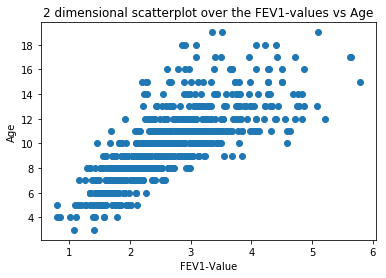

In [17]:
#Exercise 4
age = data[:,0]
FEV1 = data[:,1]

plt.scatter(FEV1, age)
plt.title('2 dimensional scatterplot over the FEV1-values vs Age')
plt.ylabel('Age')
plt.xlabel('FEV1-Value')


# all functions used from Joel Grus, Data Science from Scratch (52-63)
# Only the corr-function is modified a bit, to not work on nonequally sized vectors
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))
def sum_of_squares(v):
    return dot(v, v)
def mean(x):
    return sum(x) / len(x)
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)
def standard_deviation(x):
    return np.sqrt(variance(x))
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)
def corr(vector_x, vector_y):
    if (len(vector_x) != len(vector_y)):
        print("Not equally sized vectors")
    else:
        stdev_x = standard_deviation(vector_x)
        stdev_y = standard_deviation(vector_y)
        if ((stdev_x > 0) and (stdev_y > 0)):
            return covariance(vector_x, vector_y) / stdev_x / stdev_y 
        else:
            return 0
corr(FEV1,age)

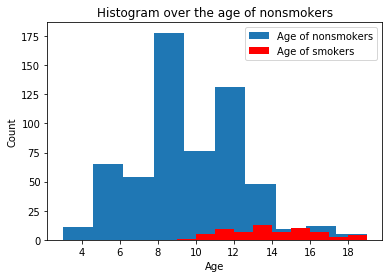

In [18]:
#Exercise 5
age_smokers = np.array([data[i,0] for i, x in enumerate(data[:,4]) if x == 1])
age_nonsmokers = np.array([data[i,0] for i, x in enumerate(data[:,4]) if x == 0])

plt.hist(age_nonsmokers, label='Age of nonsmokers')
plt.hist(age_smokers, color='red', label='Age of smokers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram over the age of nonsmokers')
plt.legend()